# Data Set
## x = words index , y positive or negative 
### num_words : Rank by frequency

In [10]:
!pip install numpy==1.16.1


     |████████████████████████████████| 17.3MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [1]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000) 
print (x_test[0], y_test[0])

Using TensorFlow backend.


[1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717] 0


### VAL : Out of Rank , Verification Set

In [0]:
x_val = x_train[20000:]
y_val = y_train[20000:]

x_train = x_train[:20000]
y_train = y_train[:20000]

In [0]:
from keras.preprocessing import sequence 

x_train = sequence.pad_sequences(x_train, maxlen = 200)
x_val = sequence.pad_sequences(x_val, maxlen = 200)
x_test = sequence.pad_sequences(x_test, maxlen = 200)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0806 05:08:07.704753 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 05:08:07.734726 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 05:08:07.738015 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
from keras import optimizers
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

W0806 05:08:09.253996 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 05:08:09.298130 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 05:08:09.305499 139825271363456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

W0806 05:08:12.820183 139825271363456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 217s 11ms/step - loss: 0.4289 - acc: 0.7980 - val_loss: 0.4179 - val_acc: 0.8144
Epoch 2/25
20000/20000 [==============================] - 310s 16ms/step - loss: 0.2313 - acc: 0.9121 - val_loss: 0.3924 - val_acc: 0.8576
Epoch 3/25
20000/20000 [==============================] - 307s 15ms/step - loss: 0.1376 - acc: 0.9493 - val_loss: 0.3781 - val_acc: 0.8502
Epoch 4/25
20000/20000 [==============================] - 304s 15ms/step - loss: 0.0887 - acc: 0.9705 - val_loss: 0.4659 - val_acc: 0.8628
Epoch 5/25
20000/20000 [==============================] - 305s 15ms/step - loss: 0.0685 - acc: 0.9775 - val_loss: 0.5443 - val_acc: 0.8338
Epoch 6/25
20000/20000 [==============================] - 310s 15ms/step - loss: 0.0501 - acc: 0.9834 - val_loss: 0.5635 - val_acc: 0.8402
Epoch 7/25
20000/20000 [==============================] - 312s 16ms/step - loss: 0.0443 - acc: 0.9861 - val_loss: 0.6

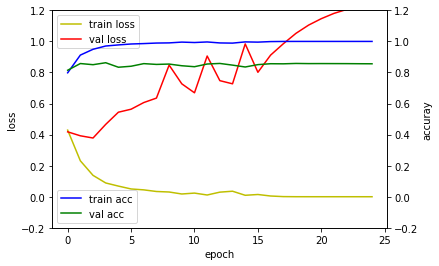

25000/25000 [==============================] - 40s 2ms/step
## evaluation loss and_metrics ##
[1.3228600700759887, 0.85176]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None
